In [7]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize'] = (10, 6)

In [8]:
file_path = "D:/Location_Github/Kaggle--project-practice/1Global Air Quality (2023) - 6 Cities/datasets/New_York_Air_Quality.csv"
New_York_City = pd.read_csv(file_path, encoding='ascii')

In [9]:
New_York_City.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
New_York_City

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-01-01 00:00:00+00:00,New York,701.0,64.25,4.50,0.0,18.7,26.7,61.640000
1,2023-01-01 01:00:00+00:00,New York,688.0,62.60,4.50,0.0,19.6,28.0,61.053333
2,2023-01-01 02:00:00+00:00,New York,668.0,60.25,4.55,0.0,14.0,20.0,60.696670
3,2023-01-01 03:00:00+00:00,New York,618.0,56.70,4.35,0.0,11.7,16.6,60.320000
4,2023-01-01 04:00:00+00:00,New York,549.0,54.55,3.90,0.0,11.7,16.8,59.933327
...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00+00:00,New York,222.0,16.50,4.10,52.0,4.0,5.9,20.800000
8756,2023-12-31 20:00:00+00:00,New York,225.0,23.00,4.80,43.0,4.4,6.4,17.200000
8757,2023-12-31 21:00:00+00:00,New York,263.0,30.40,6.00,34.0,6.3,9.1,15.200000
8758,2023-12-31 22:00:00+00:00,New York,372.0,39.60,8.10,22.0,10.4,15.0,19.800000


In [11]:
New_York_City['Date'] = pd.to_datetime(New_York_City['Date'])
New_York_City.dropna(inplace=True)

In [12]:
New_York_City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    8760 non-null   datetime64[ns, UTC]
 1   City    8760 non-null   object             
 2   CO      8760 non-null   float64            
 3   NO2     8760 non-null   float64            
 4   SO2     8760 non-null   float64            
 5   O3      8760 non-null   float64            
 6   PM2.5   8760 non-null   float64            
 7   PM10    8760 non-null   float64            
 8   AQI     8760 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 616.1+ KB


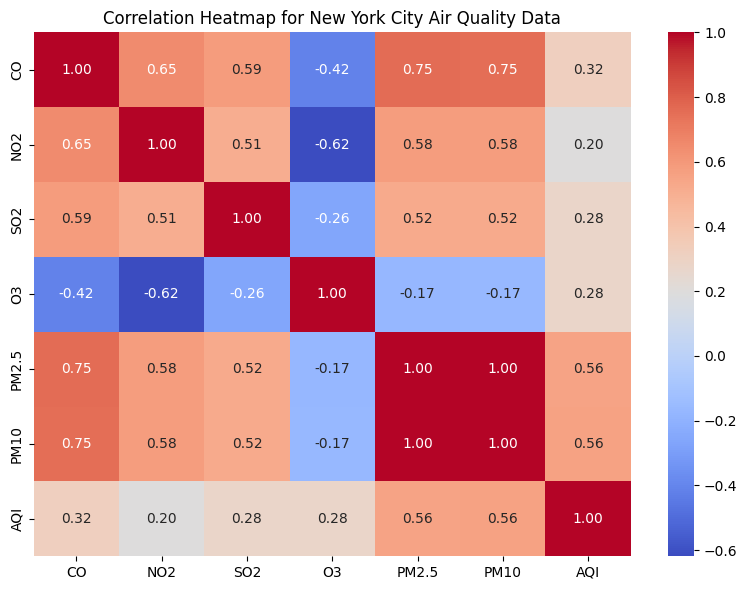

In [13]:
numeric_col = New_York_City.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_col.corr(),
             annot=True, 
             cmap='coolwarm', 
             fmt='.2f')
plt.title('Correlation Heatmap for New York City Air Quality Data')
plt.tight_layout()
plt.show()

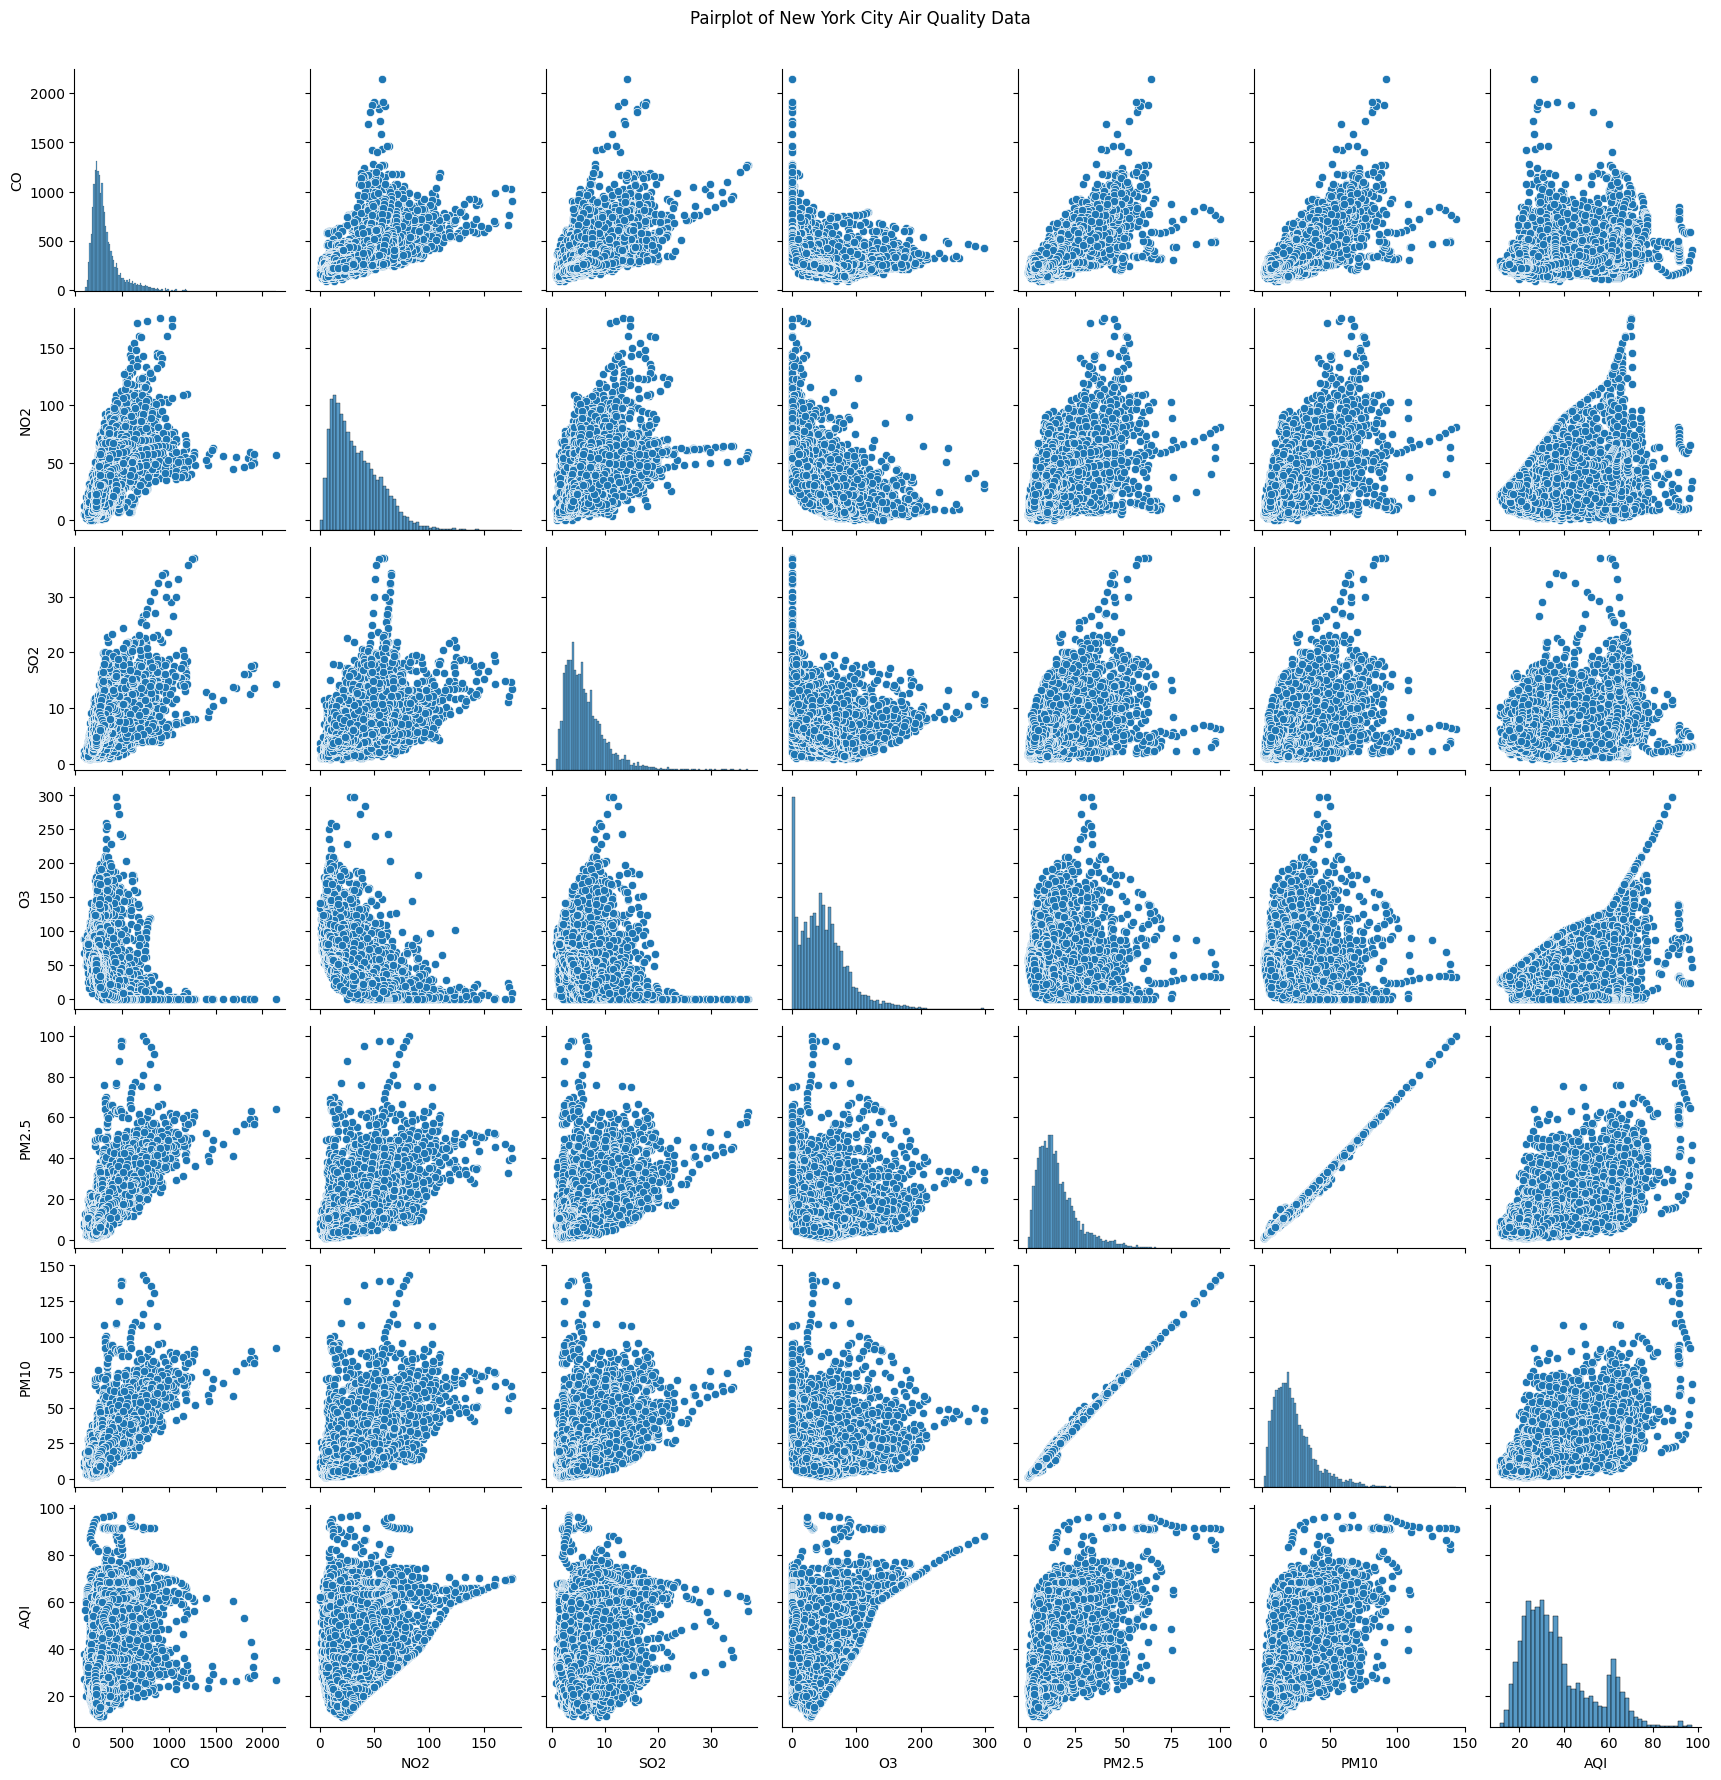

In [14]:
# sns.pairplot(New_York_City, diag_kind='kde', markers='o', height=2.5)
sns.pairplot(numeric_col)
plt.suptitle('Pairplot of New York City Air Quality Data', y=1.02)
plt.show()


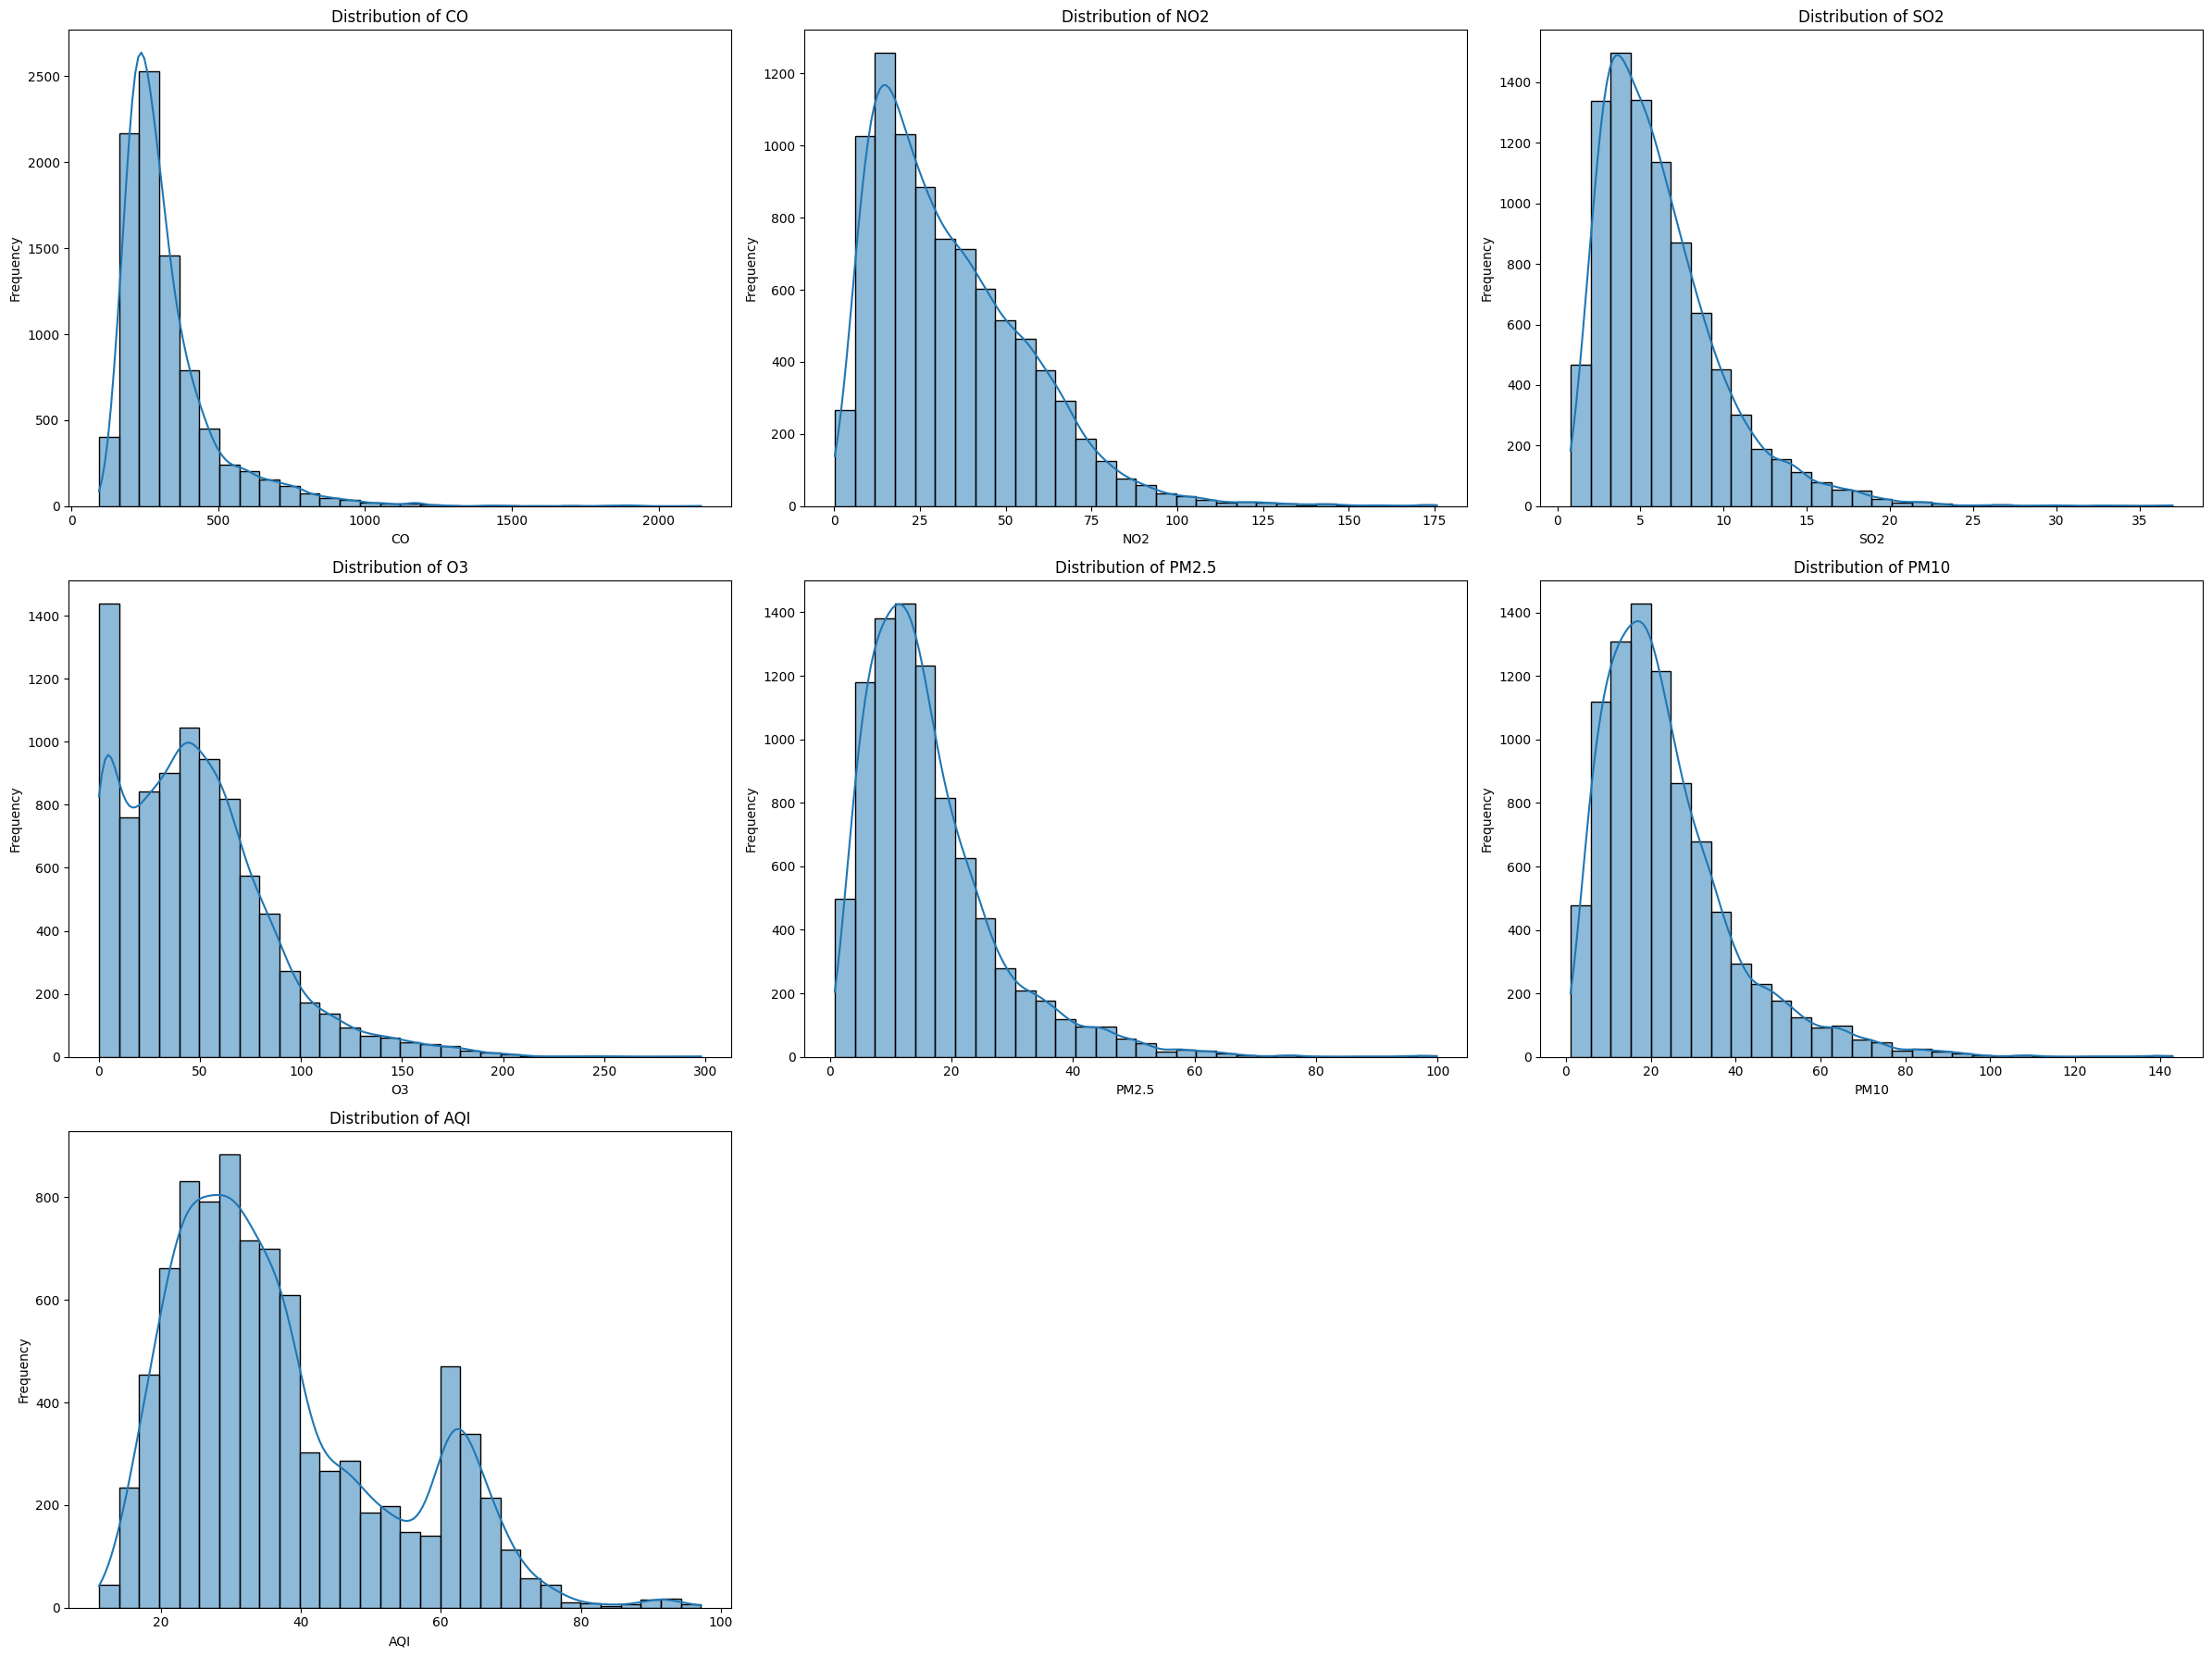

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

total = len(numeric_col.columns)
cols = 3  # 每行3个
rows = math.ceil(total / cols)

fig, axes = plt.subplots(rows, cols, figsize=(8 * cols, 6 * rows))
axes = axes.flatten()  # 展平，方便索引

for idx, col in enumerate(numeric_col.columns):
    sns.histplot(New_York_City[col], kde=True, bins=30, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# 隐藏多余子图
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Mean Squared Error: 132.37
R-squared: 0.47


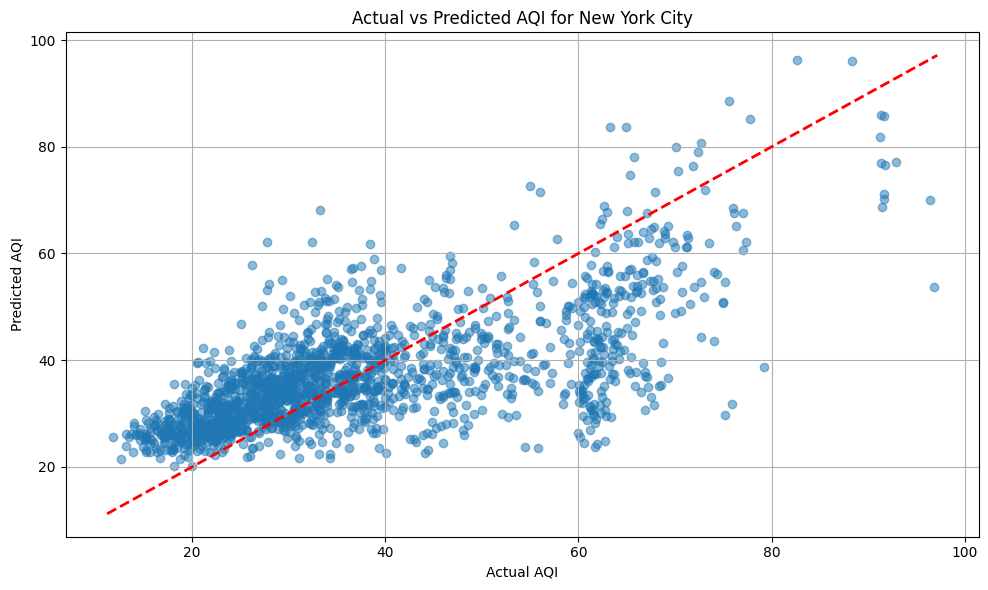

In [16]:
features_list = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']
target = 'AQI'

X = New_York_City[features_list]
y = New_York_City[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI for New York City')
plt.grid()
plt.tight_layout()
plt.show()




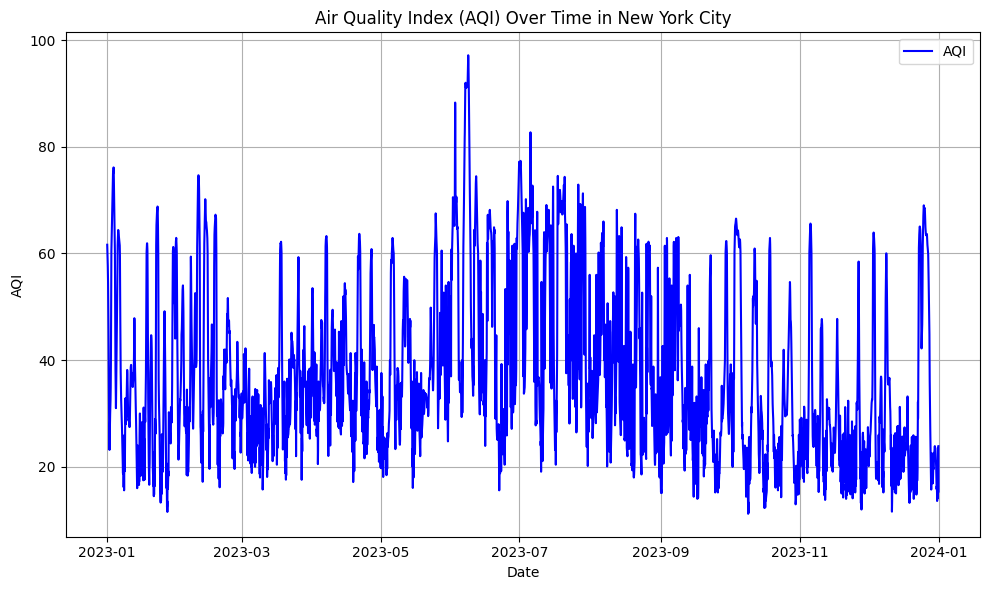

In [17]:
plt.Figure(figsize=(10, 6))
plt.plot(New_York_City['Date'], New_York_City['AQI'], label='AQI', color='blue')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Air Quality Index (AQI) Over Time in New York City')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# CNN+LSTM

In [18]:
import torch
from torch import nn

class CNNLSTM(nn.Module):
    def __init__(self, in_channels=1, feature_dim=6, seq_len=24, hidden_dim=64):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=(1, 3), padding=(0, 1)),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=(1, 3), padding=(0, 1)),
            nn.ReLU()
        )
        self.lstm = nn.LSTM(32 * feature_dim, 64, batch_first=True)
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        B, T, F, C = x.shape
        x = x.view(B * T, C, 1, F)
        x = self.conv(x).squeeze(2)  # (B*T, 通道, 特征)
        x = x.view(B, T, -1)
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return out.squeeze()

In [19]:

SEQ_LEN = 24
X_all = New_York_City[features_list].values
Y_all = New_York_City[target].values

X_seq, Y_seq = [], []

for i in range(len(X_all) - SEQ_LEN):
    X_seq.append(X_all[i:i + SEQ_LEN])
    Y_seq.append(Y_all[i + SEQ_LEN])
X_seq = np.array(X_seq)
Y_seq = np.array(Y_seq)
X_seq = np.expand_dims(X_seq, axis=-1)  # Add a channel dimension for CNN input
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, 
                                                                    Y_seq, 
                                                                    test_size=0.2, 
                                                                    random_state=42)
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_seq, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_seq, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_seq, dtype=torch.float32)




In [20]:
dates = New_York_City['Date'].values
test_size = int(len(Y_seq) * 0.2)

# 对应 test 数据的起始索引（注意 offset 是 SEQ_LEN）
test_start_index = len(Y_seq) - test_size
test_dates = dates[test_start_index + SEQ_LEN:]  # +SEQ_LEN 是因为预测的 y 是从 SEQ_LEN 开始的


In [21]:
# import os
# model = CNNLSTM()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# loss_fn = nn.MSELoss()
# best_loss = float('inf')
# save_dir = 'models'
# os.makedirs(save_dir, exist_ok=True)
# save_path = os.path.join(save_dir, 'best_model.pth')
# for epoch in range(3000):
#     model.train()
#     optimizer.zero_grad()
#     preds = model(X_train_tensor)
#     loss = loss_fn(preds, y_train_tensor)
#     loss.backward()
#     optimizer.step()

#     if (epoch + 1) % 100 == 0:
#         print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

#     if loss.item() < best_loss:
#         best_loss = loss.item()
#         torch.save(model.state_dict(), 'best_model.pth')
#         print(f"Best model saved at epoch {epoch+1} with loss {best_loss:.4f}")

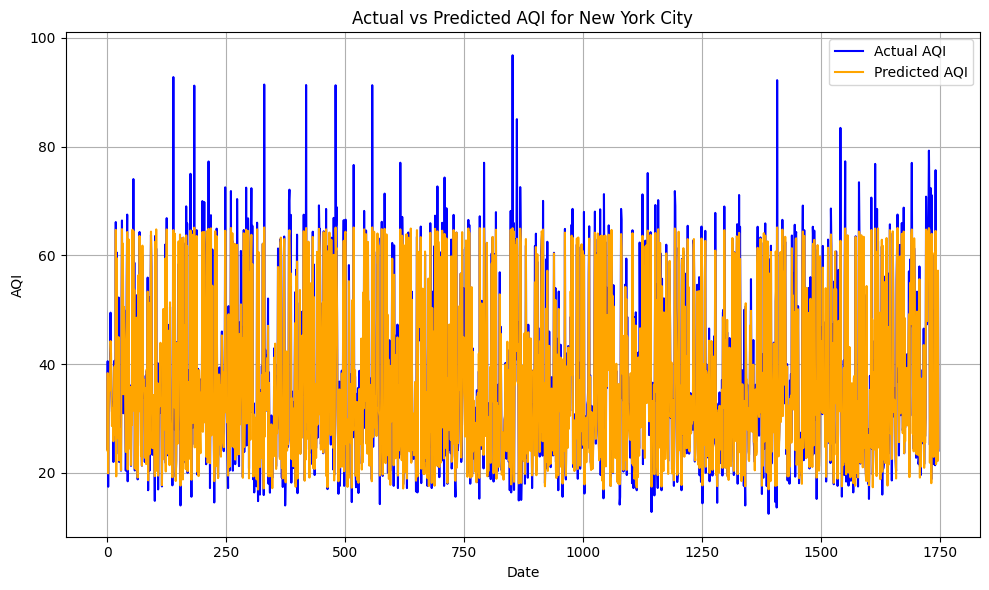

In [26]:
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
with torch.no_grad():
    y_pred_seq = model(X_test_tensor)
    y_pred_seq = y_pred_seq.numpy()

plt.figure(figsize=(10, 6))
plt.plot( y_test_seq, label='Actual AQI', color='blue')
plt.plot( y_pred_seq, label='Predicted AQI', color='orange')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI for New York City')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [23]:
model = CNNLSTM()